## Introduction

To be added...

In [1]:
import numpy as np
from spode.util import generate, visualize

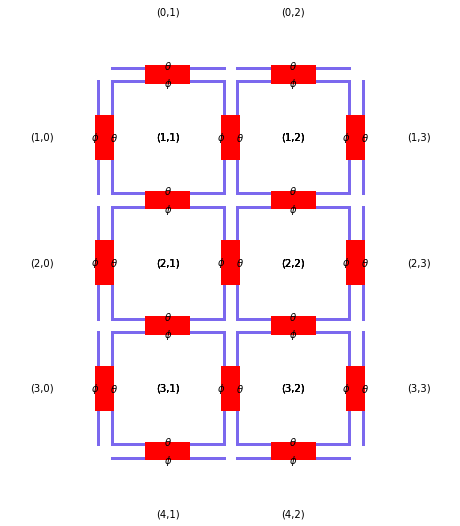

In [2]:
circuit_element = generate('square_1', [3, 2], init_dict={'theta': 0, 'phi': 0.5 * np.pi})
visualize(circuit_element, 'square_1', line2d_property={}, polygon_property={},
              annotate=['all_cell', 'all_ps_symbol'])

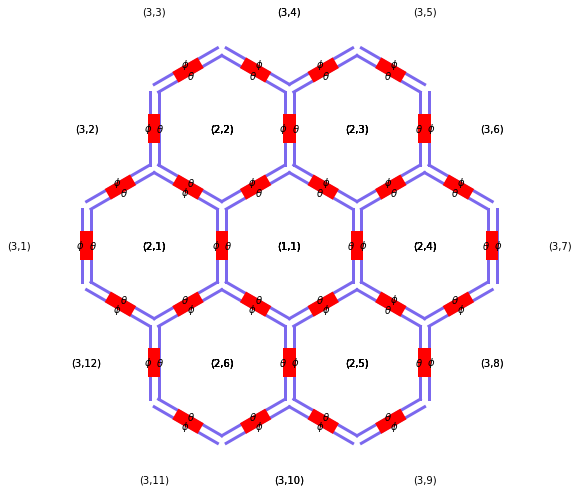

In [3]:
circuit_element = generate('hexagonal_1', [2], init_dict={'theta': 0, 'phi': 0.5 * np.pi})
visualize(circuit_element, 'hexagonal_1', line2d_property={}, polygon_property={},
              annotate=['all_cell', 'all_ps_symbol'])

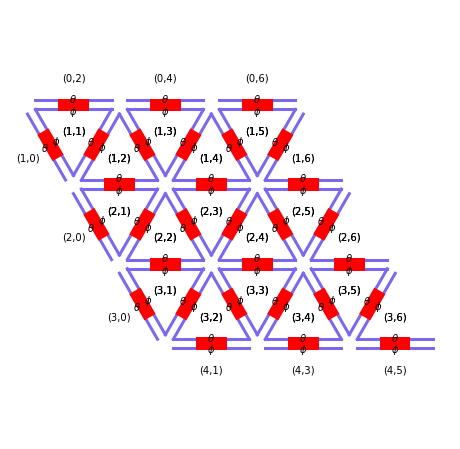

In [4]:
circuit_element = generate('triangular_1', [3, 5], init_dict={'theta': 0, 'phi': 0.5 * np.pi})
visualize(circuit_element, 'triangular_1', line2d_property={}, polygon_property={},
              annotate=['all_cell', 'all_ps_symbol'], text_property={})